In [138]:
import pandas as pd
from datetime import date

Main takeaways:
- 300+ COVID complaints in CT, 38 currently open
- Only two resulted in penalties, both receiving maximum amounts (Link here: https://www.osha.gov/news/newsreleases/national/10092020) Only 60+ nationwide
- Vast majority of complaints in heatlhcare, followed by manufacturing
- Vast majority of complaints do not result in investigations
- OSHA does not have a COVID-19 specific standards 
- CT-specific OSHA guidelines?
- Penalty scale is here https://www.osha.gov/penalties/

# Read in OSHA file and clean it

In [139]:
df_open = pd.read_csv('Copy_of_Open_Federal_and_State_Plan_Valid_Covid-19_Complaints_through_October_4.xlsx - UPA One Liner Detail.csv')

In [ ]:
#open 

In [144]:
df_open_ct = df_open[(df_open['RID']=='01-120-00')|(df_open['RID']=='01-115-00')|(df_open['RID']=='01-509-00')]

In [147]:
df_open_ct['Receipt Date'] = pd.to_datetime(df_open_ct['Receipt Date'])

/Users/kasturipananjady/.pyenv/versions/3.7.1/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
# Hartford Area
# Bridgeport
# State OSHA office

In [160]:
len(df_open_ct)

38

In [154]:
df_open_ct['RID'].value_counts()

01-120-00    19
01-115-00    14
01-509-00     5
Name: RID, dtype: int64

In [196]:
df_open_ct['Insp ID'].value_counts(dropna=False)

NaN          31
1475696.0     2
1479251.0     1
1479626.0     1
1483844.0     1
1488908.0     1
1491971.0     1
Name: Insp ID, dtype: int64

In [157]:
df_open_ct['Industry_code'] = df_open_ct['Primary/Site NAICS'].str.extract(r'(\d\d)')

/Users/kasturipananjady/.pyenv/versions/3.7.1/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [158]:
df_ct_open_complaints_by_industry = pd.DataFrame(df_open_ct['Industry_code'].value_counts()).reset_index().rename(columns={
    'index':'Code',
    'Industry_code': 'complaints_open'
})

In [166]:
df_ct_open_complaints_by_industry.Code = df_ct_open_complaints_by_industry.Code.astype(int)

In [169]:
df_ct_open_complaints_by_industry = df_ct_open_complaints_by_industry.merge(df_naisc, left_on='Code', right_on='Code').drop(columns='Number of Business Establishments')

In [ ]:
#closed

In [190]:
df_closed['Insp ID'].value_counts()

1482808.0    7
1484919.0    4
1474295.0    4
1474648.0    4
1473196.0    4
            ..
1483860.0    1
1483858.0    1
1483856.0    1
1483848.0    1
1487045.0    1
Name: Insp ID, Length: 670, dtype: int64

In [4]:
df_closed= pd.read_csv('Copy_of_Closed_Federal_and_State_Plan_Valid_Covid-19_Complaints_through_October_4.xlsx - UPA One Liner Detail.csv')

In [204]:
df_closed

,RID,Act ID,Establishment Name\nSite City-State-Zip,County,Primary/Site NAICS,Receipt Date,Receipt Type,Formality,Insp ID,Addl' Code,Hazard Desc and Location,No Alleged Hazards/No Emp Exposed
0,01-111-00,C-1664823,Half Pints Preschool & Daycare Center\n7 Eusti...,KENNEBEC,624410 /\n624410,9/24/2020,Phone,Nonformal,NaN,N-16-COVID-19:,The employer is not enforcing CDC guidelines a...,1/\n11
1,01-114-00,C-1655035,U.S. Postal Service\n305 South Washington Stre...,BRISTOL,491110 /\n491110,9/3/2020,Phone,Nonformal,NaN,N-16-COVID-19:,1. Not everyone is wearing a face mask fully ...,2/\n2
2,01-114-00,C-1659760,"Yotel Boston\n65 Seaport Boulevard, BOSTON, MA...",SUFFOLK,721110 /\n721110,9/14/2020,Online,Nonformal,NaN,N-16-COVID-19:,An employee tested positive for COVID-19 afte...,1/\n75
3,01-114-00,C-1662856,"US Postal Service\n333 Commerce Drive, BRAINTR...",NORFOLK,491110 /\n491110,9/22/2020,Phone,Nonformal,NaN,N-16-COVID-19:,"333 Commerce Drive, Braintree, Ma. \n\nThe wea...",1/\n10
4,01-115-00,C-1659207,Macys Logistics and Operations\n475 Knotter Dr...,NEW HAVEN,541614 /\n541614,9/14/2020,Online,Formal,NaN,N-16-COVID-19:,Employees lowering Covid-19 masks to talk to o...,/\n
...,...,...,...,...,...,...,...,...,...,...,...,...
26958,10-553-60,C-1634751,KAISER ALUMINUM FABRICATED PRODUCTS DBA KAISER...,SPOKANE,331314 /\n331314,7/30/2020,Mail,Nonformal,NaN,N-16-COVID-19:,Facilitator not maintaining social distancing ...,/\n
26959,10-553-60,C-1638244,JTI COLFAX LLC DBA JONES TRUCK & IMPLEMENT\n42...,WHITMAN,423820 /\n423820,8/4/2020,Mail,Nonformal,NaN,N-16-COVID-19:,Between 30-40 employees at each location not w...,/\n
26960,10-553-60,C-1641925,PIONEER HUMAN SERVICES DBA SPOKANE RESIDENTIAL...,SPOKANE,561210 /\n561210,8/10/2020,Mail,Formal,NaN,N-16-COVID-19:,Coworker tested positive for COVID-19 and came...,/\n
26961,10-553-60,C-1642846,SPOKANE COUNTY DBA SPOKANE COUNTY\nW 1116 Broa...,SPOKANE,921120 /\n921120,8/11/2020,Mail,Formal,NaN,N-16-COVID-19:,Employees not wearing masks.,/\n


In [191]:
df_closed

,RID,Act ID,Establishment Name\nSite City-State-Zip,County,Primary/Site NAICS,Receipt Date,Receipt Type,Formality,Insp ID,Addl' Code,Hazard Desc and Location,No Alleged Hazards/No Emp Exposed
0,01-111-00,C-1664823,Half Pints Preschool & Daycare Center\n7 Eusti...,KENNEBEC,624410 /\n624410,9/24/2020,Phone,Nonformal,NaN,N-16-COVID-19:,The employer is not enforcing CDC guidelines a...,1/\n11
1,01-114-00,C-1655035,U.S. Postal Service\n305 South Washington Stre...,BRISTOL,491110 /\n491110,9/3/2020,Phone,Nonformal,NaN,N-16-COVID-19:,1. Not everyone is wearing a face mask fully ...,2/\n2
2,01-114-00,C-1659760,"Yotel Boston\n65 Seaport Boulevard, BOSTON, MA...",SUFFOLK,721110 /\n721110,9/14/2020,Online,Nonformal,NaN,N-16-COVID-19:,An employee tested positive for COVID-19 afte...,1/\n75
3,01-114-00,C-1662856,"US Postal Service\n333 Commerce Drive, BRAINTR...",NORFOLK,491110 /\n491110,9/22/2020,Phone,Nonformal,NaN,N-16-COVID-19:,"333 Commerce Drive, Braintree, Ma. \n\nThe wea...",1/\n10
4,01-115-00,C-1659207,Macys Logistics and Operations\n475 Knotter Dr...,NEW HAVEN,541614 /\n541614,9/14/2020,Online,Formal,NaN,N-16-COVID-19:,Employees lowering Covid-19 masks to talk to o...,/\n
...,...,...,...,...,...,...,...,...,...,...,...,...
26958,10-553-60,C-1634751,KAISER ALUMINUM FABRICATED PRODUCTS DBA KAISER...,SPOKANE,331314 /\n331314,7/30/2020,Mail,Nonformal,NaN,N-16-COVID-19:,Facilitator not maintaining social distancing ...,/\n
26959,10-553-60,C-1638244,JTI COLFAX LLC DBA JONES TRUCK & IMPLEMENT\n42...,WHITMAN,423820 /\n423820,8/4/2020,Mail,Nonformal,NaN,N-16-COVID-19:,Between 30-40 employees at each location not w...,/\n
26960,10-553-60,C-1641925,PIONEER HUMAN SERVICES DBA SPOKANE RESIDENTIAL...,SPOKANE,561210 /\n561210,8/10/2020,Mail,Formal,NaN,N-16-COVID-19:,Coworker tested positive for COVID-19 and came...,/\n
26961,10-553-60,C-1642846,SPOKANE COUNTY DBA SPOKANE COUNTY\nW 1116 Broa...,SPOKANE,921120 /\n921120,8/11/2020,Mail,Formal,NaN,N-16-COVID-19:,Employees not wearing masks.,/\n


In [16]:
df_ct_2 = df_closed[df_closed['Establishment Name\nSite City-State-Zip'].str.contains(r'CONNECTICUT')]

In [19]:
df_ct_2.County.value_counts()

HARTFORD      101
FAIRFIELD      81
NEW HAVEN      63
NEW LONDON     21
WINDHAM        14
TOLLAND        12
LITCHFIELD      9
MIDDLESEX       8
Name: County, dtype: int64

In [113]:
df_ct_2['Industry_code'] = df_ct_2['Primary/Site NAICS'].str.extract(r'(\d\d)')

/Users/kasturipananjady/.pyenv/versions/3.7.1/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [128]:
df_ct_closed_complaints_by_industry = pd.DataFrame(df_ct_2['Industry_code'].value_counts()).reset_index().rename(columns={
    'index':'Code',
    'Industry_code': 'complaints_closed'
})

In [129]:
df_ct_closed_complaints_by_industry.Code = df_ct_closed_complaints_by_industry.Code.astype(int)

In [130]:
df_naisc = pd.read_csv('NAISC.csv')

In [170]:
df_ct_closed_complaints_by_industry = df_ct_closed_complaints_by_industry.merge(df_naisc).drop(columns='Number of Business Establishments')

In [172]:
df_ct_complaints_by_industry = df_ct_closed_complaints_by_industry.merge(df_ct_open_complaints_by_industry)

In [175]:
df_ct_complaints_by_industry['total'] = df_ct_complaints_by_industry['complaints']+df_ct_complaints_by_industry['complaints_open']

In [176]:
df_ct_complaints_by_industry

,Code,complaints,Industry Title,complaints_open,total
0,62,84,Health Care and Social Assistance,13,97
1,33,32,Manufacturing,1,33
2,49,25,Transportation and Warehousing\t,2,27
3,72,19,Accommodation and Food Services,3,22
4,45,15,Retail Trade,1,16
5,48,14,Transportation and Warehousing,3,17
6,23,13,Construction,2,15
7,56,12,Administrative and Support and Waste Managemen...,1,13
8,54,10,Professional,1,11
9,42,10,Wholesale Trade,4,14


In [201]:
df_ct_2['Insp ID'].value_counts(dropna=False)

NaN          302
1476019.0      2
1488717.0      1
1474175.0      1
1475832.0      1
1473758.0      1
1471634.0      1
Name: Insp ID, dtype: int64

In [90]:
len(df_ct_2)

309

In [31]:
df_ct_2['Receipt Date'] = pd.to_datetime(df_ct_2['Receipt Date'])

/Users/kasturipananjady/.pyenv/versions/3.7.1/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [178]:
df_open_ct['weight']=1

/Users/kasturipananjady/.pyenv/versions/3.7.1/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [49]:
df_ct_2['weight']=1

/Users/kasturipananjady/.pyenv/versions/3.7.1/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [52]:
df_complaints_over_time = pd.DataFrame(df_ct_2.groupby(by='Receipt Date').sum()).reset_index().rename(columns={
    'weight': 'Closed Complaints'
})

In [179]:
df_complaints_over_time_2 = pd.DataFrame(df_open_ct.groupby(by='Receipt Date').sum()).reset_index().rename(columns={
    'weight': 'Open Complaints'
})

In [206]:
idx = pd.date_range('03-01-2020', '08-16-2020')

In [207]:
df_complaints_over_time = df_complaints_over_time.set_index('Receipt Date')

In [208]:
df_complaints_over_time.index = pd.DatetimeIndex(df_complaints_over_time.index)

df_complaints_over_time = df_complaints_over_time.reindex(idx, fill_value=0)


In [214]:
df_complaints_over_time = df_complaints_over_time.reset_index()

In [215]:
df_complaints_over_time_2 = df_complaints_over_time_2.set_index('Receipt Date')
df_complaints_over_time_2.index = pd.DatetimeIndex(df_complaints_over_time_2.index)
df_complaints_over_time_2 = df_complaints_over_time_2.reindex(idx, fill_value=0)

KeyError: "None of ['Receipt Date'] are in the columns"

In [216]:
df_complaints_over_time_2 = df_complaints_over_time_2.reset_index()

In [218]:
df_all_complaints_over_time= df_complaints_over_time_2.merge(df_complaints_over_time)

In [223]:
df_all_complaints_over_time.columns

Index(['index', 'Insp ID', 'Open Complaints', 'Closed Complaints'], dtype='object')

In [226]:
df_all_complaints_over_time['All'] = df_all_complaints_over_time['Open Complaints']+df_all_complaints_over_time['Closed Complaints']

In [134]:
df_complaints_over_time_by_industry = pd.DataFrame(df_ct_2.groupby(by=['Receipt Date','Industry_code']).sum()).reset_index().rename(columns={
    'weight': 'Closed Complaints'
})

# OSHA over time

In [91]:
#since March

<AxesSubplot:xlabel='index'>

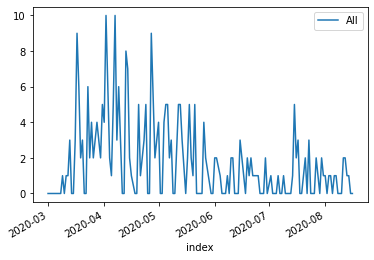

In [229]:
df_all_complaints_over_time.plot(x='index', y='All')

In [ ]:
#healthcare, medical

In [92]:
#since July 1; note the axis starts at 1

<AxesSubplot:xlabel='index'>

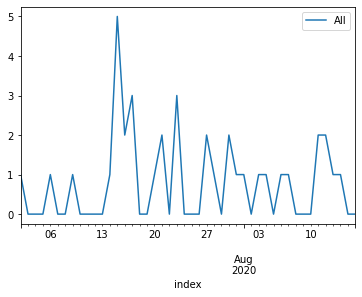

In [232]:
df_all_complaints_over_time[df_all_complaints_over_time['index']>'2020-07-01'].plot(x='index', y='All')

# Deaths over time

In [65]:
df_deaths = pd.read_csv('COVID-19_Tests__Cases__Hospitalizations__and_Deaths__Statewide_ (1).csv')

In [68]:
df_deaths['Date'] = pd.to_datetime(df_deaths['Date'])

In [72]:
df_deaths = df_deaths.sort_values(by='Date')

In [103]:
df_deaths['Total cases each day'] = df_deaths['Total cases'].diff()

In [78]:
df_deaths['Total deaths each day'] = df_deaths['Total deaths'].diff()

In [ ]:
#since March

In [186]:
df_deaths['Seven day rolling average of deaths per 100'] = df_deaths['Total deaths each day'].rolling(7).mean()/100

<AxesSubplot:xlabel='Date'>

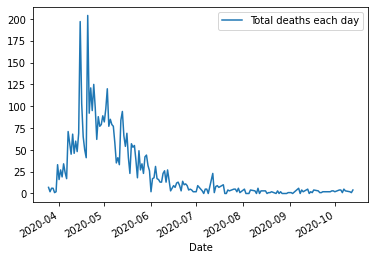

In [79]:
df_deaths.plot(x='Date', y='Total deaths each day')

<AxesSubplot:xlabel='Date'>

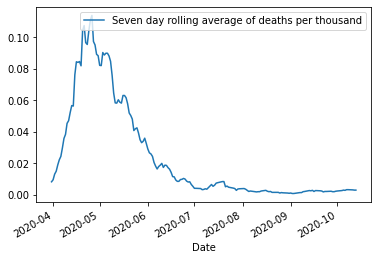

In [183]:
df_deaths.plot(x='Date', y='Seven day rolling average of deaths per thousand')

In [ ]:
#since July 1

<AxesSubplot:xlabel='Date'>

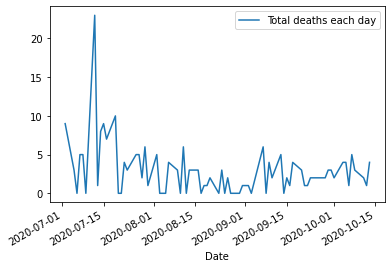

In [80]:
df_deaths[df_deaths['Date']>'2020-07-01'].plot(x='Date', y='Total deaths each day')

# Superimposing the curves

In [81]:
import matplotlib.pyplot as plt

In [ ]:
#since March

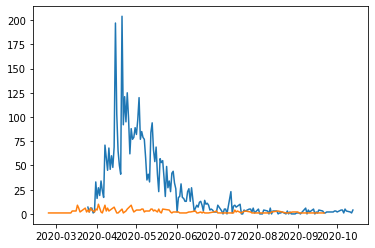

In [84]:
fig,ax = plt.subplots()
ax.plot(df_deaths['Date'], df_deaths['Total deaths each day'])
ax.plot(df_complaints_over_time['Receipt Date'], df_complaints_over_time['Closed Complaints'])

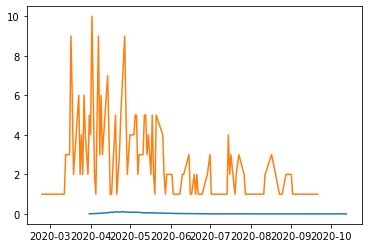

In [203]:
fig,ax = plt.subplots()
ax.plot(df_deaths['Date'], df_deaths['Seven day rolling average of deaths per thousand'])
ax.plot(df_complaints_over_time['Receipt Date'], df_complaints_over_time['Closed Complaints'])

In [ ]:
#since July 1

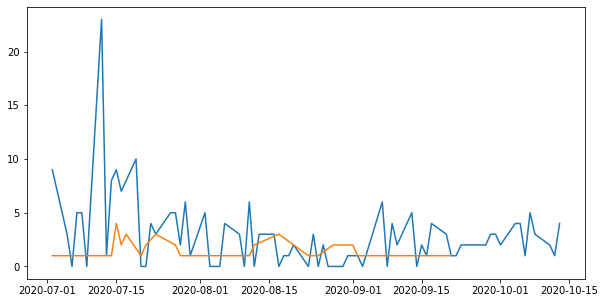

In [95]:
fig,ax = plt.subplots(figsize=(10, 5))
ax.plot(df_deaths[df_deaths['Date']>'2020-07-01']['Date'], df_deaths[df_deaths['Date']>'2020-07-01']['Total deaths each day'])
ax.plot(df_complaints_over_time[df_complaints_over_time['Receipt Date']>'2020-07-01']['Receipt Date'], df_complaints_over_time[df_complaints_over_time['Receipt Date']>'2020-07-01']['Closed Complaints'])

In [ ]:
fig,ax = plt.subplots()
ax.plot(df_deaths[df_deaths['Date']>'2020-07-01']['Date'], df_deaths[df_deaths['Date']>'2020-07-01']['Total deaths each day'])
ax.plot(df_complaints_over_time[df_complaints_over_time['Receipt Date']>'2020-07-01']['Receipt Date'], df_complaints_over_time[df_complaints_over_time['Receipt Date']>'2020-07-01']['Closed Complaints'])

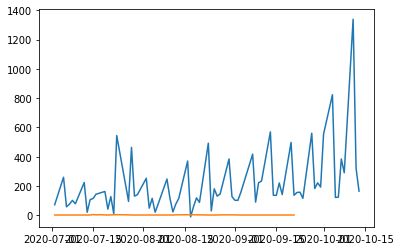

In [104]:
fig,ax = plt.subplots()
ax.plot(df_deaths[df_deaths['Date']>'2020-07-01']['Date'], df_deaths[df_deaths['Date']>'2020-07-01']['Total cases each day'])
ax.plot(df_complaints_over_time[df_complaints_over_time['Receipt Date']>'2020-07-01']['Receipt Date'], df_complaints_over_time[df_complaints_over_time['Receipt Date']>'2020-07-01']['Closed Complaints'])

In [105]:
df_complaints_over_time.to_csv('OSHA_closedcomp_sinceJuly1_CT.csv', index=False)

In [137]:
df_ct_2.to_csv('CT_Closed_OSHA.csv',index=False)